In [1]:
import plotly.express as px
import pandas as pd

color_discrete_map = {"CellProfiler": "rgb(0,114,178)"}

Code for generating the mAP figures. The data tables were generated by `1.calculate-map-cp.ipynb`.

In [2]:
cp_replicability_df = (
    pd.read_csv("output/cellprofiler_replicability_map.csv")
    .replace({"compound": "Compound", "crispr": "CRISPR", "orf": "ORF"})
    .assign(feature_set="CellProfiler")
)

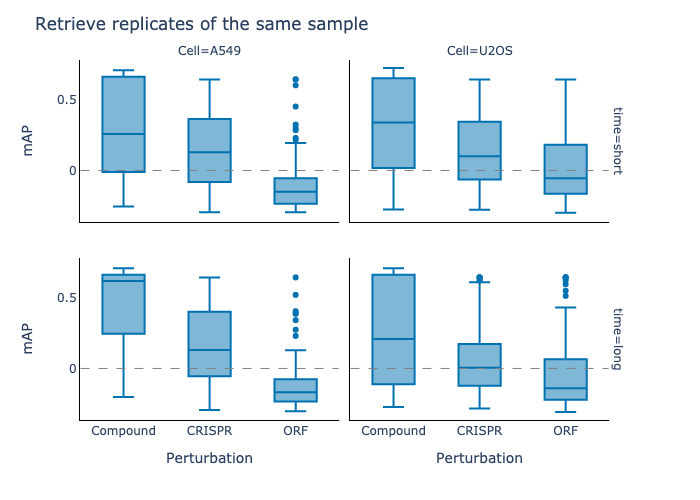

In [3]:
fig = px.box(
    data_frame=cp_replicability_df,
    x="Modality",
    y="mAP",
    color="feature_set",
    boxmode="group",
    facet_row="time",
    facet_col="Cell",
    color_discrete_map=color_discrete_map,
    facet_row_spacing=0.1,
)

# Add horizontal line at 0 for each subplot

for i in range(cp_replicability_df.time.nunique()):
    for j in range(cp_replicability_df.Cell.nunique()):
        fig.add_shape(
            type="line",
            x0=-0.5,
            x1=2.5,
            y0=0,
            y1=0,
            line=dict(color="grey", width=1, dash="dash"),
            row=i,
            col=j,
        )

fig.update_layout(
    title="Retrieve replicates of the same sample",
    xaxis1=dict(title="Perturbation", linecolor="#000000"),
    xaxis2=dict(title="Perturbation", linecolor="#000000"),
    xaxis3=dict(linecolor="#000000"),
    xaxis4=dict(linecolor="#000000"),
    yaxis1=dict(title="mAP", linecolor="#000000"),
    yaxis2=dict(linecolor="#000000"),
    yaxis3=dict(title="mAP", linecolor="#000000"),
    yaxis4=dict(linecolor="#000000"),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    showlegend=False,
)
fig.show("png")
fig.write_image(f"figures/3.replicability_map.png", width=640, height=480, scale=2)

In [4]:
cp_matching_df = (
    pd.read_csv("output/cellprofiler_matching_map.csv")
    .assign(Cell_timepoint=lambda x: x.Cell + "_" + x.time)
    .assign(feature_set="CellProfiler")
    .replace({"compound": "Compound", "crispr": "CRISPR", "orf": "ORF"})
)

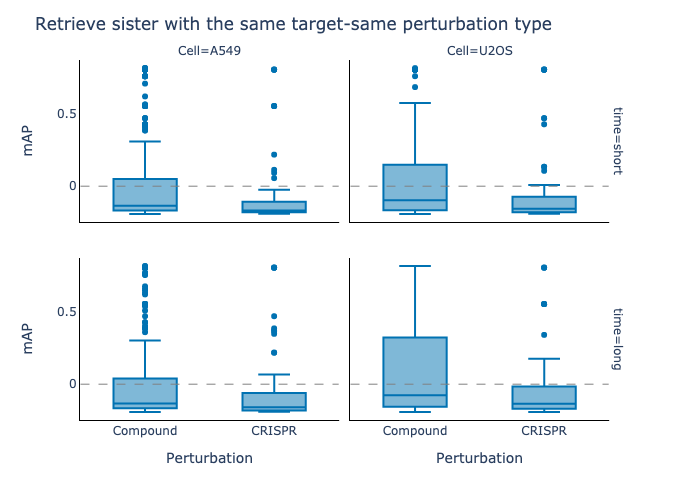

In [5]:
fig = px.box(
    data_frame=cp_matching_df,
    x="Modality",
    y="mAP",
    color="feature_set",
    boxmode="group",
    facet_row="time",
    facet_col="Cell",
    color_discrete_map=color_discrete_map,
    facet_row_spacing=0.1,
)

for i in range(cp_replicability_df.time.nunique()):
    for j in range(cp_replicability_df.Cell.nunique()):
        fig.add_shape(
            type="line",
            x0=-0.5,
            x1=1.5,
            y0=0,
            y1=0,
            line=dict(color="grey", width=1, dash="dash"),
            row=i,
            col=j,
        )

fig.update_layout(
    title="Retrieve sister with the same target-same perturbation type",
    xaxis1=dict(title="Perturbation", linecolor="#000000"),
    xaxis2=dict(title="Perturbation", linecolor="#000000"),
    xaxis3=dict(linecolor="#000000"),
    xaxis4=dict(linecolor="#000000"),
    yaxis1=dict(title="mAP", linecolor="#000000"),
    yaxis2=dict(linecolor="#000000"),
    yaxis3=dict(title="mAP", linecolor="#000000"),
    yaxis4=dict(linecolor="#000000"),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    showlegend=False,
)
fig.show("png")
fig.write_image(f"figures/3.matching_map.png", width=640, height=480, scale=2)

In [6]:
cp_gene_compound_df = (
    pd.read_csv("output/cellprofiler_gene_compound_matching_map.csv")
    .replace({"compound": "Compound", "crispr": "CRISPR", "orf": "ORF"})
    .assign(feature_set="CellProfiler")
)

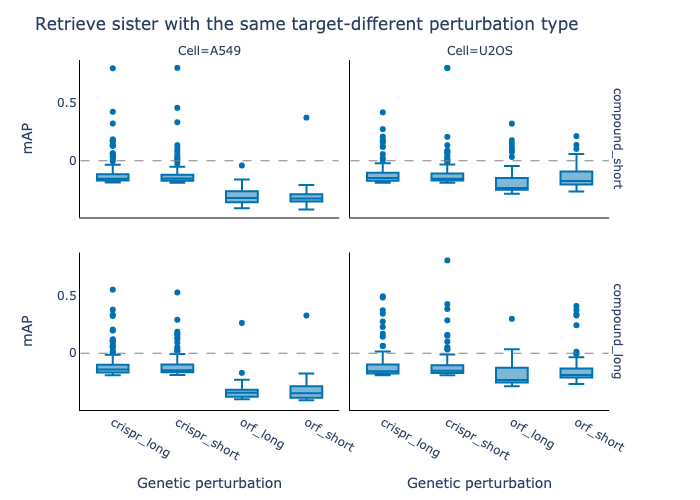

In [7]:
fig = px.box(
    data_frame=cp_gene_compound_df,
    x="Modality2",
    y="mAP",
    color="feature_set",
    boxmode="group",
    facet_col="Cell",
    facet_row="Modality1",
    color_discrete_map=color_discrete_map,
    facet_row_spacing=0.1,
)

for i in range(cp_replicability_df.time.nunique()):
    for j in range(cp_replicability_df.Cell.nunique()):
        fig.add_shape(
            type="line",
            x0=-0.5,
            x1=3.5,
            y0=0,
            y1=0,
            line=dict(color="grey", width=1, dash="dash"),
            row=i,
            col=j,
        )

fig.update_layout(
    title="Retrieve sister with the same target-different perturbation type",
    xaxis1=dict(title="Genetic perturbation", linecolor="#000000"),
    xaxis2=dict(title="Genetic perturbation", linecolor="#000000"),
    xaxis3=dict(linecolor="#000000"),
    xaxis4=dict(linecolor="#000000"),
    yaxis1=dict(title="mAP", linecolor="#000000"),
    yaxis2=dict(linecolor="#000000"),
    yaxis3=dict(title="mAP", linecolor="#000000"),
    yaxis4=dict(linecolor="#000000"),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    showlegend=False,
)
fig.for_each_annotation(lambda a: a.update(text=a.text.replace("Modality1=", "")))
fig.show("png")
fig.write_image(
    f"figures/3.gene_compound_matching_map.png", width=640, height=480, scale=2
)